In [70]:
# import all necessary modules here

from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# set Mongo DB connection, select database amd table/collection

try:
    mongoConnection = MongoClient('mongodb://localhost:27017/')
except:
    print("Could not connect to MongoDB Database!!!")
    logging.warning('Could not connect to MongoDB Database!!!')
# Switch to Existing Database named siemensDubai_iQunet_Processed_Database

db = mongoConnection['TestLoop_NewRaw_Data']
Datacollection = db['New_raw_data']
DF_Sensor_Loc = db['Mac_Fault_list']

In [11]:
# excel sheet imported to check sensor location and faults induced

df_sesnor_loc = pd.read_excel('Induced Failures in the test Loop.xlsx',sheet_name='Log of induced defects')

In [45]:
df_sesnor_loc[(df_sesnor_loc.Macid == MacID) & (df_sesnor_loc['Defects Introduced'] == fault)]

,Entry Date,Defects Introduced,Asset-Id,Sensor Location,Conveyor Type,Macid,Start Time,End Time,Update by,Remarks
3,2020-07-13,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_TST,METERING,4c:92:10:8c,2020-07-13 15:00:00.000,2020-07-13 17:00:00,Vishal,NaN
12,2020-07-14,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_DSF,METERING,4c:92:10:8c,2020-07-14 08:29:59.995,2020-07-14 14:30:00,Anandh,NaN
21,2020-07-14,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_DUL,METERING,4c:92:10:8c,2020-07-14 14:30:00.000,2020-07-15 10:25:00,Anandh,NaN
30,2020-07-15,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_DUR,METERING,4c:92:10:8c,2020-07-15 10:25:00.000,2020-07-15 14:15:00,Anandh,NaN
40,2020-07-15,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_CFL,METERING,4c:92:10:8c,2020-07-15 14:15:00.000,2020-07-15 17:00:00,Anandh,NaN
50,2020-07-15,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_CFR,METERING,4c:92:10:8c,2020-07-15 17:00:00.000,2020-07-16 12:30:00,Anandh,NaN
60,2020-07-16,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_TUL,METERING,4c:92:10:8c,2020-07-16 12:30:00.000,2020-07-19 09:20:00,Anandh,NaN
70,2020-07-19,Slight Wobling in the motor,101.CA.DTL.01.1-210,MET_TUR,METERING,4c:92:10:8c,2020-07-19 09:20:00.000,2020-07-19 13:10:00,Anandh,NaN


In [57]:
# select and filter data from mongodb

MacID = "a8:ce:7d:2b" # select the sesnor 
fault = "Slight Wobling in the motor"  # select type of fault

#Raw_Data = pd.DataFrame(Datacollection.find({"Mac_Id":MacID,'Defect_Introduced':fault}))
Raw_Data = pd.DataFrame(Datacollection.find({"Mac_Id":MacID}))
Raw_Data.drop(["_id","index"],axis=1,inplace=True)

Data = Raw_Data.copy()  # creating a copy of data


print(Data.shape)   # check the data of data retrived from mongodb
processed = Raw_Data.loc[:,'Data_pull_time':'Sensor_Loc'] # extract only first 6 columns

(517, 4102)


In [55]:
Data.head(3)

,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc,Vsample1,Vsample2,Vsample3,Vsample4,...,Vsample4087,Vsample4088,Vsample4089,Vsample4090,Vsample4091,Vsample4092,Vsample4093,Vsample4094,Vsample4095,Vsample4096
0,2020-07-13 15:17:28,a8:ce:7d:2b,X,No Defect_No Load,101.CA.DTL.01.1-030,DEC_TST,0.171875,0.015625,0.00000,0.015625,...,0.109375,0.09375,0.078125,0.015625,0.000000,0.000000,-0.015625,-0.015625,-0.031250,-0.031250
1,2020-07-13 15:33:46,a8:ce:7d:2b,X,No Defect_No Load,101.CA.DTL.01.1-030,DEC_TST,0.171875,0.015625,0.00000,0.015625,...,0.015625,0.00000,0.015625,0.031250,0.046875,0.031250,0.031250,0.093750,0.046875,0.046875
2,2020-07-13 15:54:35,a8:ce:7d:2b,X,No Defect_No Load,101.CA.DTL.01.1-030,DEC_TST,0.171875,0.078125,0.09375,0.109375,...,0.000000,0.00000,0.000000,0.015625,0.031250,0.015625,0.062500,0.078125,0.093750,0.140625


### calculate max,   min,   average,   std, Peak 2 Peak, Kurtosis, RMS, Variance

In [58]:
processed['Max'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1)
processed['Min'] = Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
processed['Mean'] = Data.loc[:,'Vsample1':'Vsample4096'].mean(axis=1)
processed['Std'] = Data.loc[:,'Vsample1':'Vsample4096'].std(axis=1)
processed['P2P'] = Data.loc[:,'Vsample1':'Vsample4096'].max(axis=1) - Data.loc[:,'Vsample1':'Vsample4096'].min(axis=1)
processed['Kurt'] = Data.loc[:,'Vsample1':'Vsample4096'].kurt(axis=1)
processed['RMS'] =  (Data.loc[:,'Vsample1':'Vsample4096']**2).sum(1).pow(1/2)
processed['Var'] = Data.loc[:,'Vsample1':'Vsample4096'].var(axis=1)

In [118]:
processed.tail()


,Data_pull_time,Mac_Id,Axis,Defect_Introduced,Asset_Id,Sensor_Loc,Max,Min,Mean,Std,P2P,Kurt,RMS,Var,Fault_color
512,2020-08-03 11:07:20,a8:ce:7d:2b,Y,Decline-Non Drive Side Tesnion unit faulty bea...,101.CA.DTL.01.1-030,DEC_EDT,0.156250,-2.390625,-1.000854,0.289830,2.546875,0.372686,66.685750,0.084002,3
513,2020-08-03 09:33:39,a8:ce:7d:2b,Z,Decline-Non Drive Side Tesnion unit faulty bea...,101.CA.DTL.01.1-030,DEC_EDT,-0.171875,-0.734375,-0.625370,0.025331,0.562500,26.072427,40.056494,0.000642,3
514,2020-08-03 10:10:33,a8:ce:7d:2b,Z,Decline-Non Drive Side Tesnion unit faulty bea...,101.CA.DTL.01.1-030,DEC_EDT,1.828125,-2.109375,-0.096436,0.344771,3.937500,1.816869,22.909671,0.118867,3
515,2020-08-03 10:49:45,a8:ce:7d:2b,Z,Decline-Non Drive Side Tesnion unit faulty bea...,101.CA.DTL.01.1-030,DEC_EDT,1.828125,-2.000000,-0.089882,0.348411,3.828125,2.541842,23.025727,0.121390,3
516,2020-08-03 11:08:04,a8:ce:7d:2b,Z,Decline-Non Drive Side Tesnion unit faulty bea...,101.CA.DTL.01.1-030,DEC_EDT,1.234375,-1.312500,-0.087078,0.348211,2.546875,0.253348,22.969127,0.121251,3


In [94]:
processed.Defect_Introduced.value_counts()

flt_color = {"No Defect_No Load":0,
            "No Defect_Empty Tray":1,
            "Decline-Non Drive Side Tesnion unit faulty bearing- with no Tray":2,
            "Decline-Non Drive Side Tesnion unit faulty bearing & Drive side belt removed- with no Tray":3}

color = [ flt_color[i] for i in processed.Defect_Introduced]

processed['Fault_color'] = color

processed.Fault_color  = processed.Fault_color.astype('category')


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [90]:
processed.plot('Mean',c=color)

ValueError: view limit minimum -36890.33825462963 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

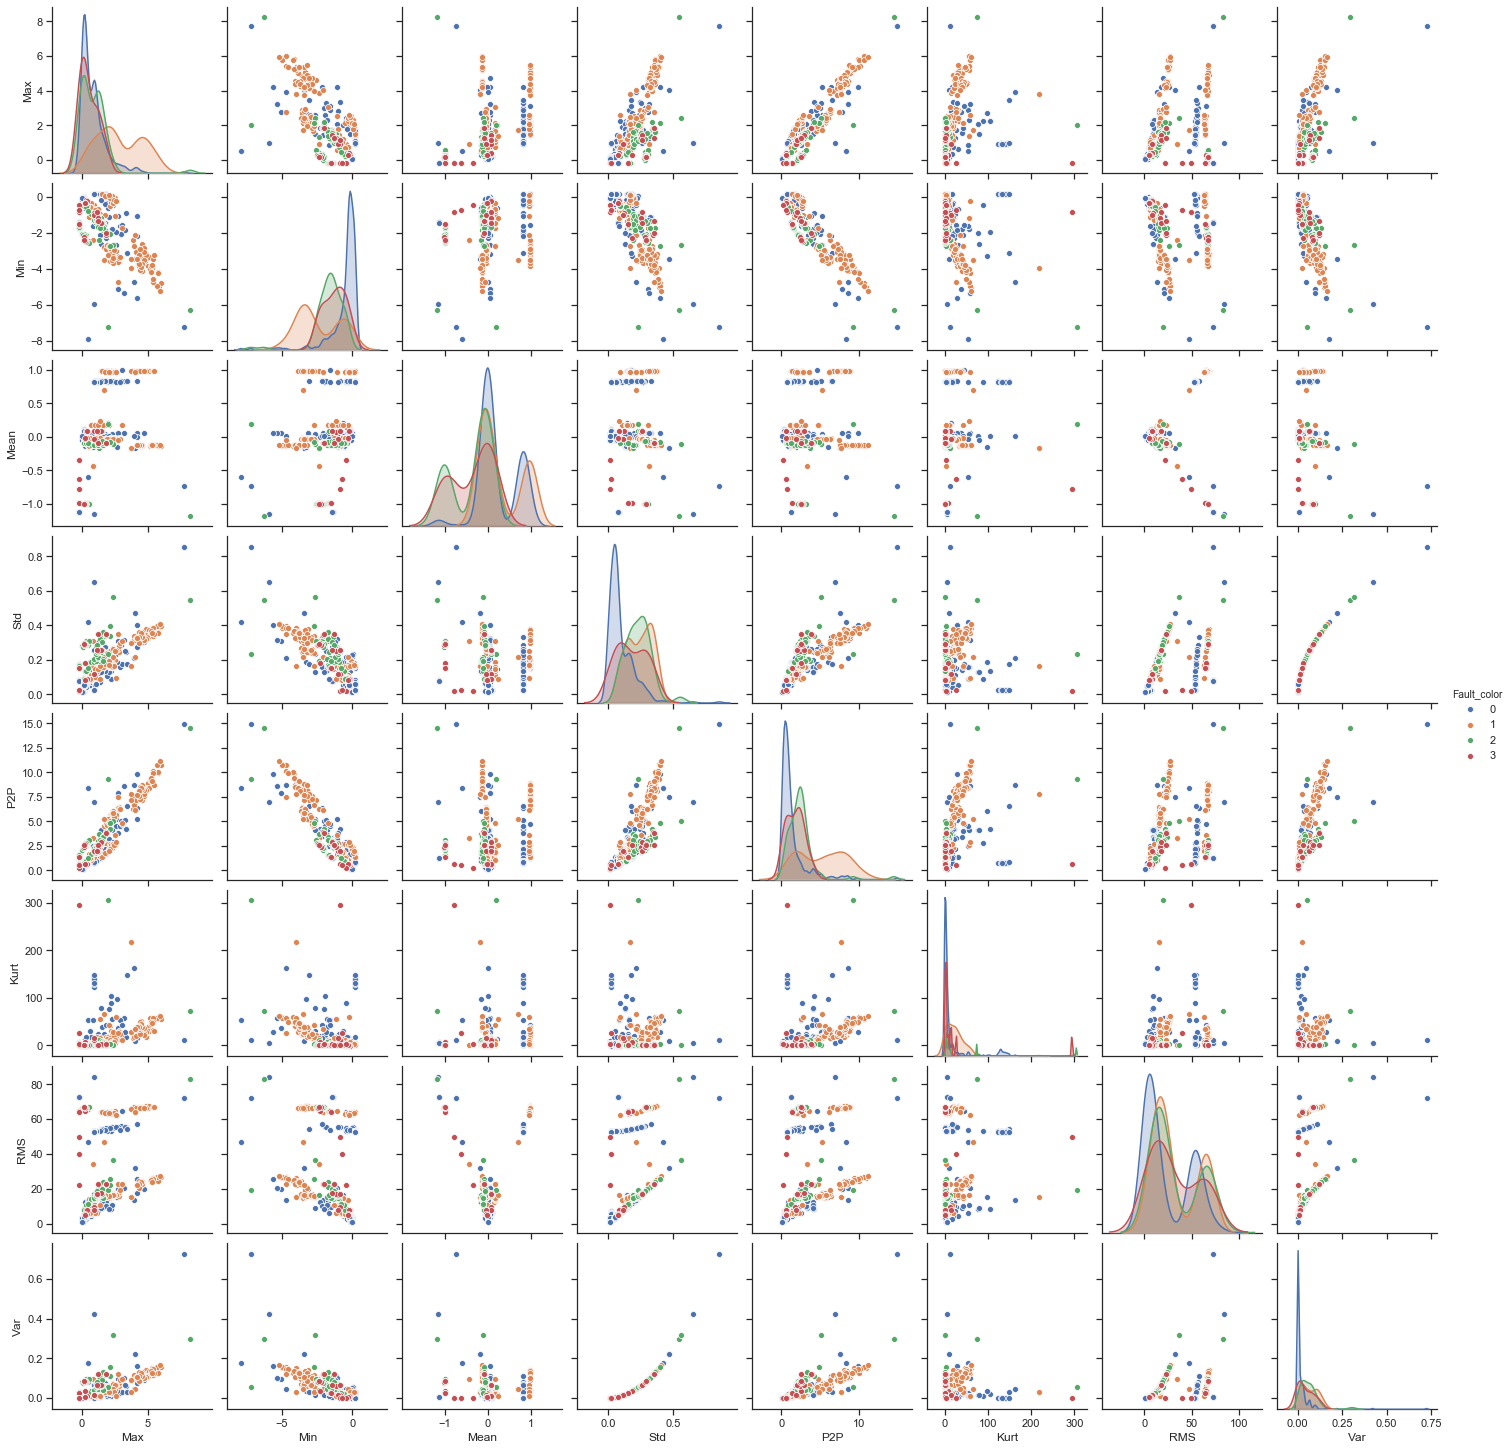

In [113]:
#sns.set(style="ticks", color_codes=True)
sns.pairplot(processed, vars=processed.columns[6:-1],hue='Fault_color')

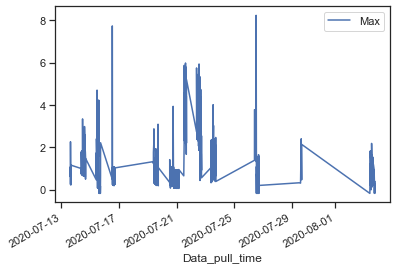

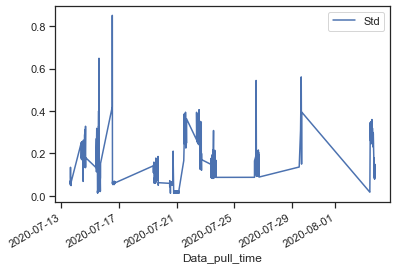

In [126]:
#for y in processed.columns[6:-1]:
    #print(y)
    #sns.lineplot(x='Data_pull_time', y=col, hue='Fault_color', data=processed)
processed.plot(x='Data_pull_time',y=["Max"]) 
processed.plot(x='Data_pull_time',y=["Std"]) 

In [ ]:
import matplotlib.pylpot as plt

fig,ax =plt.subplots(nrows=2.ncols=4)

for row in ax:
    for col in row:
        col.plot(processed['Data_pull_time'],c)
plt.show()

### trying Clustering

In [127]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = processed[["Max","Min"]]
  
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Max'], df['Min'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### no fault and with fault data merge

In [157]:
MacID = "a8:ce:7d:2b" # select the sesnor 
case1 = "Decline-Non Drive Side Tesnion unit faulty bearing & Drive side belt removed- with no Tray"  # select type of fault
case2 = "No Defect_No Load"

pro2 = processed[processed["Defect_Introduced"].isin([case1, case2])]

In [158]:
pro2.shape

(310, 15)

[[ 0.64358259 -0.31540179]
 [ 2.90416667 -3.02395833]]


NameError: name 'scatter' is not defined

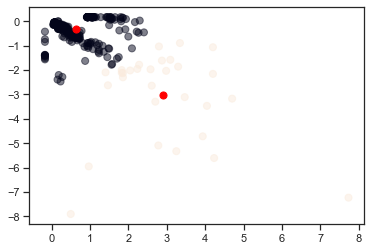

In [162]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pro2[["Max","Min"]]
  
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Max'], df['Min'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.legend(handles=scatter.legend_elements()[0])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


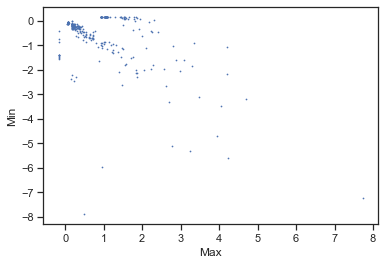

In [164]:
# Generate data based on the above parameters
pro2.plot(kind='scatter', x='Max', y='Min', s=0.5);

In [169]:
df_data = pro2[["Min","Max"]]
cls = KMeans(init='k-means++', n_clusters=2, n_init=10)
cls.fit(df_data)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
df_data['predicted_label'] = cls.labels_.astype(int)
df_data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Min,Max,predicted_label
0,-0.140625,0.265625,0
1,-0.687500,0.609375,0
2,-0.125000,0.234375,0
3,-0.140625,0.234375,0
4,-0.140625,0.296875,0


## K Neighbor clustreing

In [200]:
pro2.Fault_color.value_counts()

0    289
3     21
2      0
1      0
Name: Fault_color, dtype: int64

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [187]:
data_to_model = pro2.loc[:,"Max":"Var"]
target = pro2["Fault_color"]

In [210]:
X_train,X_test,y_train,y_test = train_test_split(data_to_model,target,test_size=0.3,shuffle=True)

In [211]:
knn = KNeighborsClassifier()

In [212]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [213]:
predict= knn.predict(X_test)

In [214]:
accuracy_score(y_test,predict)

0.9247311827956989